# Module 1
The objective of this module is to make the students familiar with some commands of Control package of Python for analysis of feedback control systems.

---
__Manuals__
1. [Python Control System Library (MATLAB compatibility module)](https://python-control.readthedocs.io/en/0.9.2/matlab.html)
2. [Numpy](https://numpy.org/devdocs/index.html)
---

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this module.

Some instructions or examples will be provided for sections and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

This file will be used as your report. Any comments or answers should be added as `markdown` blocks inside the relevant subsection.

<div class="alert alert-block alert-warning">
<b>Warning:</b> Only the comments in <code>markdown</code> blocks and outputs of the cell will be considered for grading. Any comments inside the code blocks or variable which are not printed to output will be ignored. Use <code>View > Render Notebook with Voilà</code> menu to preview the rendered file which will be graded.
</div>

---

### Imports
Import various dependencies <span style="color:red">(_Do not touch_)</span>

In [9]:
import control
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math

control.config.use_numpy_matrix(False)
%matplotlib widget

# Set Numpy to only print upto 4th decimal
np.set_printoptions(formatter={'float': '{: 10.4f}'.format})

def print_system(text, sys):
    """Print LTI systems in a pretty manner.

    Parameters
    ----------
    text : str
        Name of the LTI system
    sys : LTI system
        System to pretty print
    """
    display(Math(f"\\text{{{text}}} = {sys._repr_latex_()[2:-2]}"))

### Plant Model
- Define the plant parameters and its TF.
- Verify various plant chacteristics.

__Note:__ This section is mainly used to introduce students to various common functions of the control library.

<div class="alert alert-block alert-info">

__Hint:__ To pretty print the LTI systems, use the custom command 

```python
print_system('name', system)
```
</div>

In [10]:
# TODO: Create TF of the plant
#   ex: G = tf([1, 1], [1, 2])
#   ex: s = tf('s')
#       G = (s + 1)/(s + 2)

Ka = 1.0
Rm = 2.2
Km = 0.00987
Kg = 60.0
Ks = 1.75
Jmot = 3.87e-7
Jmod = 3.922e-4
JBr = 0.004
b = 0.005

Jm=Jmod+pow(Kg,2)*Jmot
s = tf('s')
G = (Ks*Kg*Km*Ka)/((JBr*s*s+Ks)*(Rm*Jm*s*s+Rm*b*s+Km*Km*Kg*Kg*s)+Rm*Ks*JBr*s*s)
G = minreal(G)

# Print the TF
print_system("Plant (G)", G)

0 states have been removed from the model


<IPython.core.display.Math object>

#### Plant characteristics
<div class="alert alert-block alert-info">

__Hint:__ To print `list` in a nice manner, use

```python
print("ListName = [", " , ".join([f"{x:10.4f}" for x in list]), "]")
```

</div>

In [11]:
# Zeros and Poles of Plant
z = zero(G)
p = pole(G)

# Print list in a readable format (Use this format for printing lists)
print("zeros = [", " , ".join([f"{x:10.4f}" for x in z]), "]")
print("poles = [", " , ".join([f"{x:10.4f}" for x in p]), "]")

zeros = [  ]
poles = [ -80.7048+0.0000j , -5.6904+21.6059j , -5.6904-21.6059j , 0.0000+0.0000j ]


In [12]:
# Print natural frequencies and damping ratio of the plant
_ = damp(G, doprint=True)

    Eigenvalue (pole)       Damping     Frequency
                -80.7             1          80.7
     -5.69    +21.61j        0.2547         22.34
     -5.69    -21.61j        0.2547         22.34
                    0             1             0


#### Time-domain analysis plots
<div class="alert alert-block alert-info">

__Hint:__ To plot graphs in a nice manner, use:

```python
plt.figure()                                            # Create a new empty figure
plt.plot(tout, yout)                                    # Plot data
plt.title('Step Response')                              # Title of the plot
plt.xlabel('Time (seconds)')                            # Label for the x-axis
plt.ylabel('Amplitude')                                 # Label for the y-axis
plt.minorticks_on()                                     # Display minor tickmarks
plt.grid(which='major', color="0.5", linestyle='-')     # Display major grid lines 
plt.grid(which='minor', color="0.75", linestyle='--')   # Display minor grid lines
plt.legend([name])                                      # Display legend
plt.show()                                              # Show generated plot
```

</div>
                                          # Show generated plot

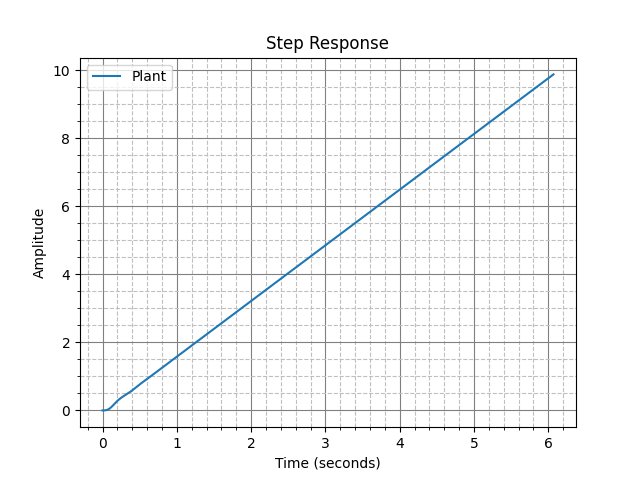

In [13]:
# Step Response of the plant
yout, tout = step(G)

plt.figure()                                            # Create a new empty figure
plt.plot(tout, yout)                                    # Plot data
plt.title('Step Response')                              # Title of the plot
plt.xlabel('Time (seconds)')                            # Label for the x-axis
plt.ylabel('Amplitude')                                 # Label for the y-axis
plt.minorticks_on()                                     # Display minor tickmarks
plt.grid(which='major', color="0.5", linestyle='-')     # Display major grid lines 
plt.grid(which='minor', color="0.75", linestyle='--')   # Display minor grid lines
plt.legend(['Plant'])                                   # Display legend
plt.show()                                              # Show generated plot

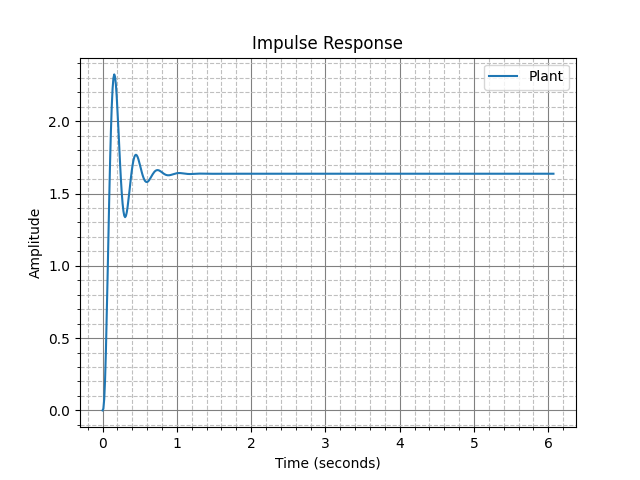

In [14]:
# Impulse Response of the plant
yout, tout = impulse(G)

plt.figure()                                            # Create a new empty figure
plt.plot(tout, yout)                                    # Plot data
plt.title('Impulse Response')                           # Title of the plot
plt.xlabel('Time (seconds)')                            # Label for the x-axis
plt.ylabel('Amplitude')                                 # Label for the y-axis
plt.minorticks_on()                                     # Display minor tickmarks
plt.grid(which='major', color="0.5", linestyle='-')     # Display major grid lines 
plt.grid(which='minor', color="0.75", linestyle='--')   # Display minor grid lines
plt.legend(['Plant'])                                   # Display legend
plt.show()                                              # Show generated plot

#### Frequency-domain analysis plots

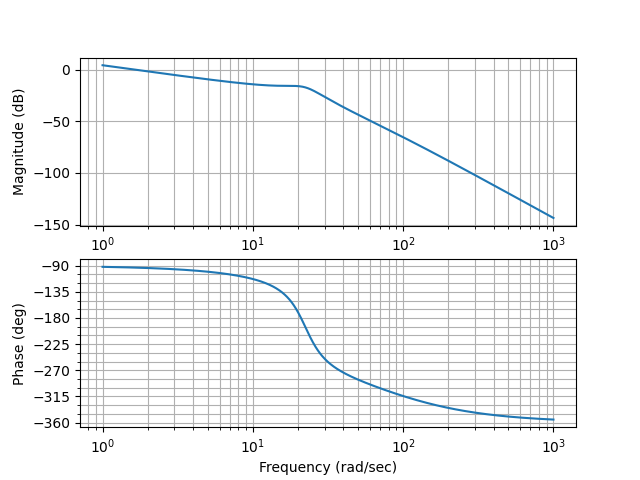

In [8]:
# Bode diagram of plant
plt.close()
plt.clf()
plt.figure("Bode Plot")
bode(G)
plt.show()

### Closed-loop TFs

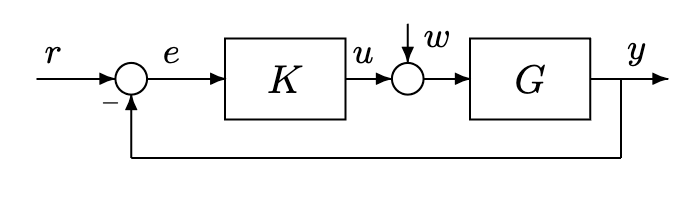

- Define the closed loop tfs for a given controller `K`.
    * Transfer function between r and e
    * Transfer function between r and u
    * Transfer function between r and y
    * Transfer function between w and y
- Complete the section to analyse the impact of a proportional controller on the closed-loop step responses.
- Keep `K = 1.2` for the final submission.

<div class="alert alert-block alert-warning">

__Note:__ Don't forget to use `minreal` when computing closed-loop transfer functions!

</div>

In [15]:
# Closed-loop tfs
#   eg: Let Block diagram for TF from `i` to `j`
#                 +
#            i ━━━━▶○━━━▶┃ L1 ┃━━━━┳━━▶ j
#                   ▲ -            ┃
#                   ┗━━━━┃ L2 ┃◀━━━┛
# 
#       We can write it as,
#           TF = feedback(L1, L2)
#           TF = L1 / (1 + L1*L2)
# 

K = 1.2 # 1.2 # NOTE: Keep K = 1.2 for final submission

# TODO: Computese the following transfer functions: (Don't forget to print them)
#   * S -> TF between r and e
#   * U -> TF between r and u
#   * T -> TF between r and y
#   * V -> TF between w and y

S = 1/(1+G*K)
S = minreal(S)
U = (K)/(1+G*K)
U = minreal(U)
T = (G*K)/(1+G*K)
T = minreal(T)
V = (G)/(1+G*K)
V = minreal(V)

0 states have been removed from the model
0 states have been removed from the model
4 states have been removed from the model
4 states have been removed from the model


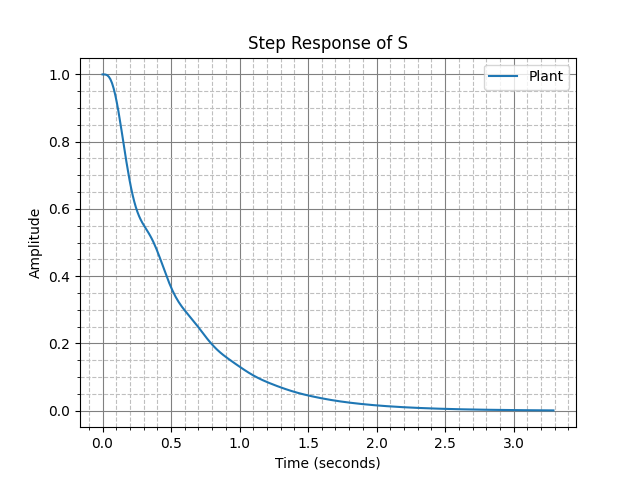

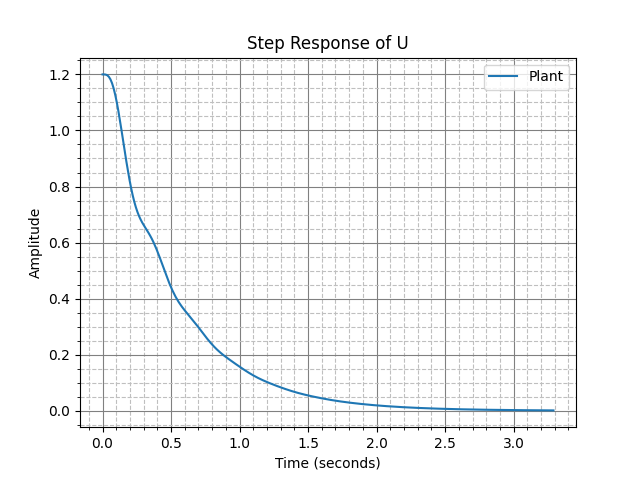

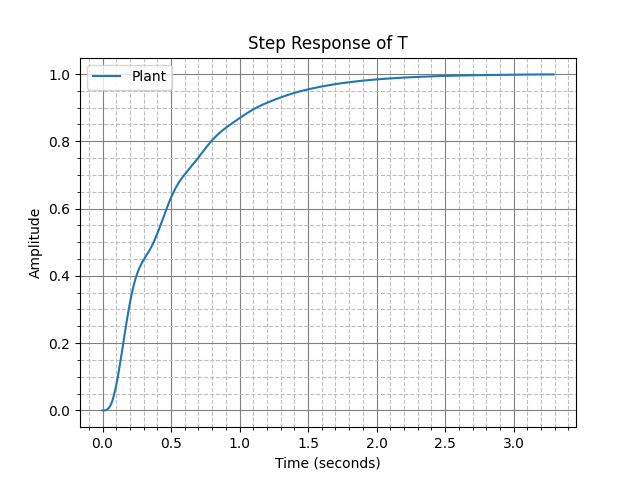

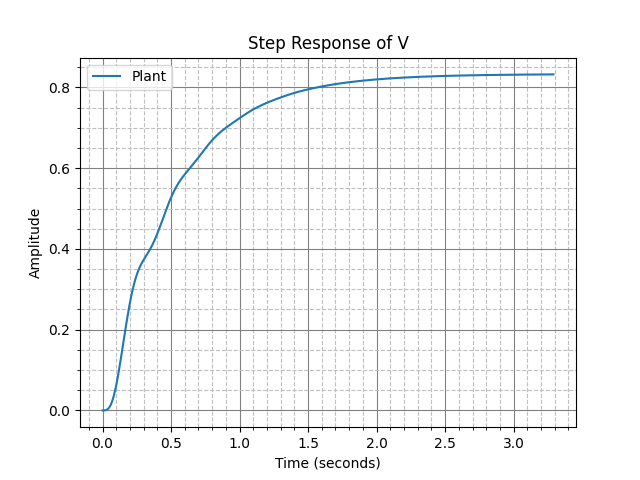

In [16]:
# TODO: Plot the step responses of the closed-loop system
#   - from reference signal to the output
#   - from reference signal to the control signal (plant input)
#   - from reference signal to the tracking error signal (the input of the controller) 
#   - from disturbance signal to the output

#### Time-domain analysis plots

# Step Response of S
yout, tout = step(S)

plt.figure()                                            # Create a new empty figure
plt.plot(tout, yout)                                    # Plot data
plt.title('Step Response of S')                         # Title of the plot
plt.xlabel('Time (seconds)')                            # Label for the x-axis
plt.ylabel('Amplitude')                                 # Label for the y-axis
plt.minorticks_on()                                     # Display minor tickmarks
plt.grid(which='major', color="0.5", linestyle='-')     # Display major grid lines 
plt.grid(which='minor', color="0.75", linestyle='--')   # Display minor grid lines
plt.legend(['Plant'])                                   # Display legend
plt.show()                                              # Show generated plot

# Step Response of the plant
yout, tout = step(U)

plt.figure()                                            # Create a new empty figure
plt.plot(tout, yout)                                    # Plot data
plt.title('Step Response of U')         # Title of the plot
plt.xlabel('Time (seconds)')                            # Label for the x-axis
plt.ylabel('Amplitude')                                 # Label for the y-axis
plt.minorticks_on()                                     # Display minor tickmarks
plt.grid(which='major', color="0.5", linestyle='-')     # Display major grid lines 
plt.grid(which='minor', color="0.75", linestyle='--')   # Display minor grid lines
plt.legend(['Plant'])                                   # Display legend
plt.show()                                          # Show generated plot

# Step Response of the plant
yout, tout = step(T)

plt.figure()                                            # Create a new empty figure
plt.plot(tout, yout)                                    # Plot data
plt.title('Step Response of T')         # Title of the plot
plt.xlabel('Time (seconds)')                            # Label for the x-axis
plt.ylabel('Amplitude')                                 # Label for the y-axis
plt.minorticks_on()                                     # Display minor tickmarks
plt.grid(which='major', color="0.5", linestyle='-')     # Display major grid lines 
plt.grid(which='minor', color="0.75", linestyle='--')   # Display minor grid lines
plt.legend(['Plant'])                                   # Display legend
plt.show()     # Show generated plot

# Step Response of the plant
yout, tout = step(V)

plt.figure()                                            # Create a new empty figure
plt.plot(tout, yout)                                    # Plot data
plt.title('Step Response of V')         # Title of the plot
plt.xlabel('Time (seconds)')                            # Label for the x-axis
plt.ylabel('Amplitude')                                 # Label for the y-axis
plt.minorticks_on()                                     # Display minor tickmarks
plt.grid(which='major', color="0.5", linestyle='-')     # Display major grid lines 
plt.grid(which='minor', color="0.75", linestyle='--')   # Display minor grid lines
plt.legend(['Plant'])                                   # Display legend
plt.show()                                          # Show generated plot


In [17]:
# TODO: Find closed-loop poles of the system



#z = zero(G)
p = pole(T)

# Print list in a readable format (Use this format for printing lists)
# print("zeros = [", " , ".join([f"{x:10.4f}" for x in z]), "]")
print("poles = [", " , ".join([f"{x:10.4f}" for x in p]), "]")

poles = [ -80.5429+0.0000j , -4.7218+21.1158j , -4.7218-21.1158j , -2.0991+0.0000j ]


#### Discussions
<span style="color:red">__Q__:</span> How does changing the gain (`K`) affect the closed-loop system? When does the system becomes unstable? (Hint: At ultimate gain, step response starts to diverge.)  
<span style="color:blue">__A__:</span>
a high K will allow the system to answer faster to change in the command but a K that is too high will make the system unstable and it will diverge.the K value at the limit is called the Ultimate Gain.


### Ultimate Gain
- Compute ultimate gain using graphical methods (`rlocus`).
- Verify it using Routh Stability Criterion.

#### Numerical result
Find the ultimate gain using `rlocus` plot.

__Hint__: The value of K for which the loci traverse the imaginary axis gives the value of the ultimate gain.

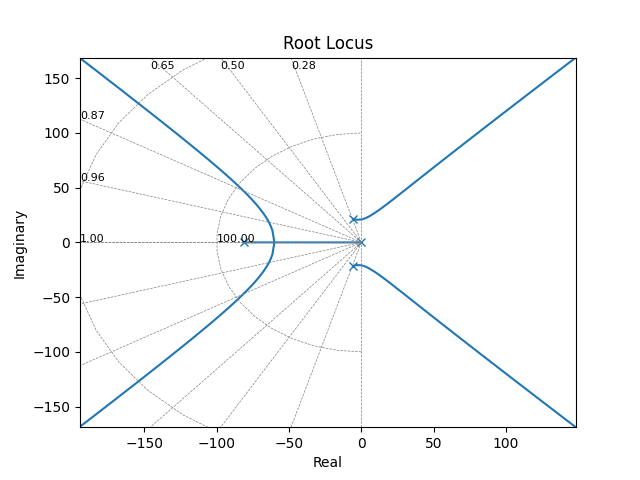

In [22]:
# Root locus
#   Click on the plot to find the gain
plt.figure()
r = rlocus(G, plot=True)
plt.show()

In [19]:
# Ultimate Gain 20.9035
Ku = 6.4993

# Use this format to print info in a readable format
print(f"Ultimate Gain (via Root Locus) = {Ku:10.4f}")

Ultimate Gain (via Root Locus) =     6.4993


#### Verification by Routh Stability Criterion
Verify the result using Routh stability criterion and show your
workings.

__Hint__: Using the Routh stability criterion, we can find the range of K for which the closed-loop system is stable. Then the smallest K that makes the closed-loop system unstable is ultimate gain.


__TODO__: Show the calculations to find ultimate gain using routh stability criterion in this section.

Equations can be inserted using Latex format.
$$G(s) = \frac{1}{s^4+92.09*s^3+1418*s^2+4.029*10^4*s}$$

$$S = \frac{GK}{1+G*K}$$

$$S = \frac{s^4*K+92.09*s^3*K+1418*s^2*K+4.029*10^4*s*K}{s^4*K+92.09*s^3*K+1418*s^2*K+4.029*10^4*s*K+1}$$


$$f(s) = x^4 + 92.09x^3 + 1418x^2 + 40290x + K\cdot 65960$$


|     | C1      | C            | C3|
|-----|---------|--------------|---|
| s^4 | $$1$$       | $$1418$$| $$K\cdot 6.596 \cdot 10^4$$ |   |   |
| s^3 | $$92.09$$   | $$4.029⋅10^4$$   | $$0$$            |   |   |
| s^2 | $$980.493$$ | $$K \cdot 6.596 \cdot 10^4$$ | $$0$$ |   |   |
| s^1 | $$-\frac{92.09 \cdot 6.596 \cdot 10^4}{980.493} K + 4.029 \cdot 10^4$$|$$0$$|$$0$$| | |
| 1   | $$K \cdot 6.596 \cdot 10^4$$|$$0$$|$$0$$|||

$$-\frac{92.09 \cdot 6.596 \cdot 10^4}{980.493} K + 4.029 \cdot 10^4 > 0$$

$$0< K < \frac{980.493 \cdot 4.029 \cdot 10^4}{92.09 \cdot 6.596 \cdot 10^4} \approx 6.6$$



### Closed-loop Step Response
- Conduct the analysis of closed loop step response for a given controller `K`. 
- Keep `K = 0.6 * Ku` for the final submission.

3.89958
4 states have been removed from the model
Rise Time      =     0.1089 s
Settling Time  =     1.1863 s
Overshoot      =     8.7137 %
Closed-loop bw =    23.9000 rad/s


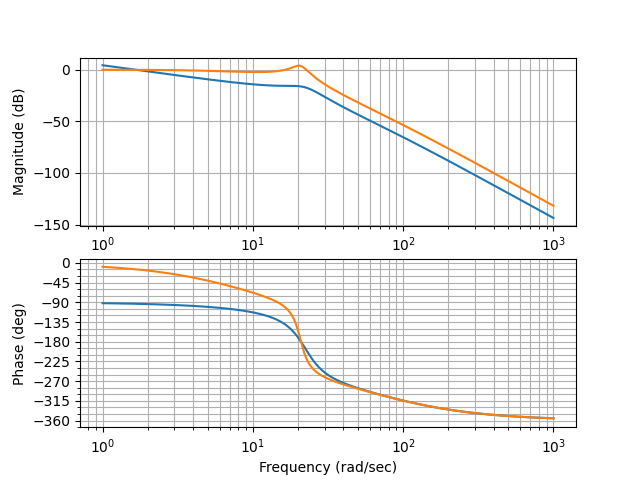

In [21]:
K = 0.6 * Ku
print(K)
T = (G*K)/(1+G*K)
T = minreal(T)
info = stepinfo(T)
#print(info)
# TODO: Give the rise time, settling time, and overshoot
#   Hint: Information about step response can be found using `stepinfo`
#       eg: info = stepinfo(S)
#           rise_time = info["RiseTime"]
rise_time = info["RiseTime"]
settling_time = info["SettlingTime"]
overshoot = info["Overshoot"]

# TODO: Give the closed-loop bandwidth
closedloop_bw = 23.90

# Use this format to print info in a readable format
print(f"Rise Time      = {rise_time:10.4f} s")
print(f"Settling Time  = {settling_time:10.4f} s")
print(f"Overshoot      = {overshoot:10.4f} %")
print(f"Closed-loop bw = {closedloop_bw:10.4f} rad/s")

plt.close()
plt.clf()
plt.figure("Bode Plot")
bode(T)
plt.show()